#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# About Features

1. **Employee ID**: A unique identifier for each employee. Usually a numeric or alphanumeric code.

2. **Name**: The full name of the employee. This might be split into first and last names in some datasets.

3. **Department**: The department or division within the organization where the employee works.

4. **Job Title**: The official title or position held by the employee in the organization.

5. **Salary**: The amount of money the employee earns. This could be represented as an annual salary, hourly wage, or monthly pay.

6. **Hire Date**: The date when the employee started working at the organization. Useful for calculating tenure or experience.

7. **Gender**: The gender of the employee. This might be included in some datasets for diversity and equality analysis.

8. **Years of Experience**: The total number of years the employee has worked in their field or profession.

9. **Education Level**: The highest level of education attained by the employee, such as a high school diploma, bachelor's degree, etc.

10. **Performance Rating**: If available, this could be a measure of the employee's performance in their role, often based on annual review scores.

11. **Location**: The geographical location or office where the employee works, if the organization has multiple locations.



# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df_original = pd.read_csv('./Salaries.csv')

# Create a copy of the dataframe
df = df_original.copy()

df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Basic Data Exploration**

In [3]:
# Identify the number of rows and columns in the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Determine the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values in each column
print("\nNumber of missing values in each column:")
print(df.isnull().sum())


The dataset has 148654 rows and 13 columns.

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Number of missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


**Calculate basic statistics**

In [4]:
# Calculate basic statistics
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()

# Range of salaries
range_salary = max_salary - min_salary

# Standard deviation
std_dev_salary = df['TotalPay'].std()

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")
print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")
print(f"Range of Salaries: {range_salary}")
print(f"Standard Deviation of Salaries: {std_dev_salary}")


Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43
Range of Salaries: 568213.56
Standard Deviation of Salaries: 50517.005273949944


**Data Cleaning**

1. Filtering Data: Filtering out rows where ‘EmployeeName’ and ‘JobTitle’ are ‘Not provided’. This is done to remove rows with incomplete information that might not be useful for the analysis.

2. Dropping Columns: Dropping the ‘Notes’ and ‘Status’ columns from the dataframe. This is typically done when the columns do not contain useful information for the analysis.

3. Replacing Zero TotalPay Values: I defined a function to replace 0 ‘TotalPay’ with the mean ‘TotalPay’ of the same job title, so far applying this function to the ‘TotalPay’ column. This is done to handle 0 and Null values in the ‘TotalPay’ column which might represent missing or incorrect data.

4. Filling Missing Values: Next filling missing values in the ‘BasePay’, ‘OtherPay’, and ‘OvertimePay’ columns with the difference between ‘TotalPay’ and the sum of the other two columns. also filling missing values in the ‘Benefits’,  ‘TotalPayBenefits’ and ‘TotalPay columns with the difference between them.

Finally, I'm rechecking the number of missing values in each column to verify that all missing values have been handled and the data is clean.

In [5]:
df = df[df['EmployeeName'] != 'Not provided']
df = df[df['JobTitle'] != 'Not provided']

# Drop 'Notes' and 'Status' columns
df.drop(columns=['Notes'], inplace=True)
df.drop(columns=['Status'], inplace=True)

# Define a function to replace 0 or null 'TotalPay' with the mean 'TotalPay' of the same job title
def replace_with_mean(row):
    if (pd.isnull(row['TotalPay']) or row['TotalPay'] == 0) and row['JobTitle'] in mean_totalpay_per_job:
        return mean_totalpay_per_job[row['JobTitle']]
    else:
        return row['TotalPay']

# Fill missing values in 'BasePay', 'OtherPay', and 'OvertimePay' columns
df['BasePay'].fillna(df['TotalPay'] - df['OtherPay'] - df['OvertimePay'], inplace=True)
df['OtherPay'].fillna(df['TotalPay'] - df['BasePay'] - df['OvertimePay'], inplace=True)
df['OvertimePay'].fillna(df['TotalPay'] - df['BasePay'] - df['OtherPay'], inplace=True)

# Fill missing values in 'Benefits' and 'TotalPay'columns
df['Benefits'].fillna(df['TotalPayBenefits'] - df['TotalPay'], inplace=True)
df['TotalPay'].fillna(df['TotalPayBenefits'] - df['Benefits'], inplace=True)
df['BasePay'].fillna(df['TotalPay'] - df['OtherPay'] - df['OvertimePay'], inplace=True)

# Calculate the mean 'TotalPay' for each job title
mean_totalpay_per_job = df[df['TotalPay'] != 0].groupby('JobTitle')['TotalPay'].mean()
# Apply the function to the 'TotalPay' column
df['TotalPay'] = df.apply(replace_with_mean, axis=1)

# Check for missing values in each column
print("\nNumber of missing values in each column:")
print(df.isnull().sum())


Number of missing values in each column:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


**Basic Data Visualization**
A histogram to visualize the distribution of salaries,
A pie chart to represent the proportion of employees in top 10 departments.

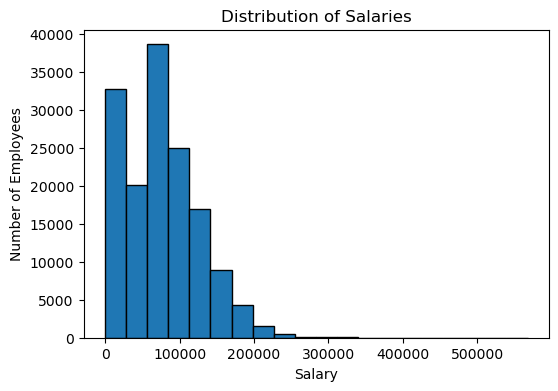

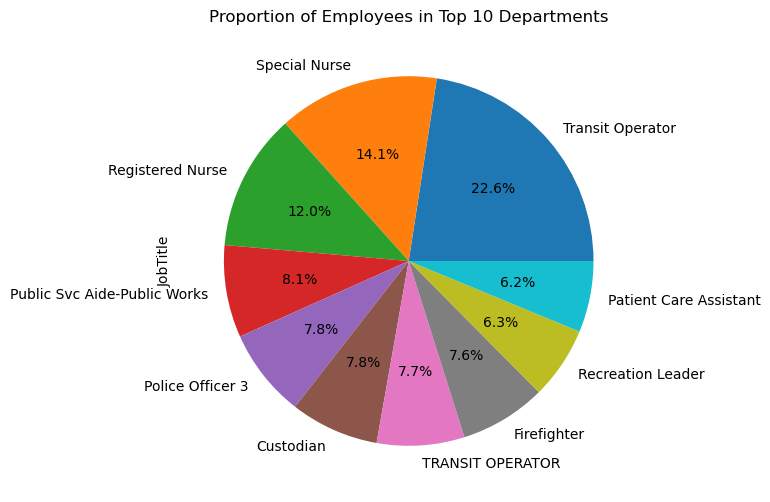

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['TotalPay'], bins=20, edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

top_departments = df['JobTitle'].value_counts().nlargest(10)
top_departments.plot(kind='pie', autopct='%1.1f%%', figsize=(10,6))
plt.title('Proportion of Employees in Top 10 Departments')
plt.show()

**Grouped Analysis**

Statics for Group by 'JobTitle':
                                                        mean       min  \
JobTitle                                                                 
ACCOUNT CLERK                                   44035.664337    614.00   
ACCOUNTANT                                      47429.268000   1148.40   
ACCOUNTANT INTERN                               29031.742917   2981.53   
ACPO,JuvP, Juv Prob (SFERS)                     62290.780000  62290.78   
ACUPUNCTURIST                                   67594.400000  67594.40   
...                                                      ...       ...   
X-RAY LABORATORY AIDE                           52705.880385   5343.69   
X-Ray Laboratory Aide                           50823.942700   1007.00   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.870000  53632.87   
Youth Comm Advisor                              41414.307500  19212.71   
ZOO CURATOR                                     66686.560000  66686.56   

    

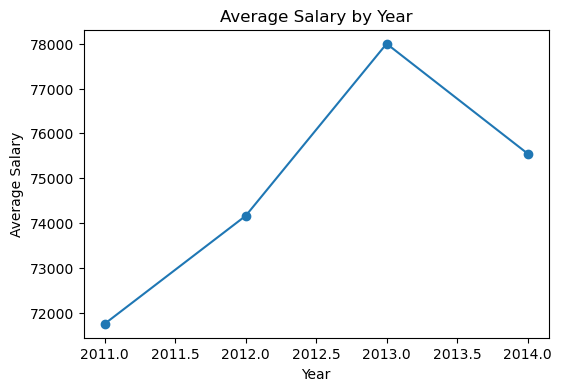

In [7]:
# Group by 'JobTitle' and calculate the mean, min, max and median of 'TotalPay'
summary_statistics = df.groupby('JobTitle')['TotalPay'].agg(['mean', 'min', 'max', 'median'])

# Display the result
print(f"Statics for Group by 'JobTitle':")
print(summary_statistics)

# Group by 'Year' and calculate the mean, min, max and median of 'TotalPay'
summary_statistics = df.groupby('Year')['TotalPay'].agg(['mean', 'min', 'max', 'median'])

# Display the result
print(f"Statics for Group by 'Year':")
print(summary_statistics)

# Plot average salary by Year
summary_statistics_by_year = df.groupby('Year')['TotalPay'].mean()
summary_statistics_by_year.plot(kind='line', marker='o', figsize=(6,4))
plt.title('Average Salary by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.show()


In [10]:
# Group by 'Year' and 'JobTitle' and calculate the mean, min, and max of 'TotalPay'
summary_statistics = df.groupby(['Year', 'JobTitle'])['TotalPay'].agg(['mean', 'min', 'max', 'median'])

# Display the result
print(summary_statistics)

summary_statistics_reset = summary_statistics.reset_index()


                                              mean        min        max  \
Year JobTitle                                                              
2011 ACCOUNT CLERK                    44035.664337     614.00   60838.20   
     ACCOUNTANT                       47429.268000    1148.40   65392.01   
     ACCOUNTANT INTERN                29031.742917    2981.53   58799.53   
     ACUPUNCTURIST                    67594.400000   67594.40   67594.40   
     ADMINISTRATIVE ANALYST           63954.867527    2388.24   79754.03   
...                                            ...        ...        ...   
2014 Wire Rope Cable Maint Sprv      190575.900000  190575.90  190575.90   
     Worker's Comp Supervisor 1       56689.446667      56.64  108144.01   
     Worker's Compensation Adjuster   70636.455385    1837.39  106050.66   
     X-Ray Laboratory Aide            51211.566857   11341.85   99812.97   
     Youth Comm Advisor               36465.910000   36465.91   36465.91   

           

**Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

                  TotalPay   BasePay  OvertimePay  OtherPay  Benefits  \
TotalPay          1.000000  0.952333     0.504587  0.470136  0.631391   
BasePay           0.952333  1.000000     0.268119  0.281787  0.654139   
OvertimePay       0.504587  0.268119     1.000000  0.316592  0.226165   
OtherPay          0.470136  0.281787     0.316592  1.000000  0.160334   
Benefits          0.631391  0.654139     0.226165  0.160334  1.000000   
TotalPayBenefits  0.975389  0.946861     0.467981  0.422341  0.781955   

                  TotalPayBenefits  
TotalPay                  0.975389  
BasePay                   0.946861  
OvertimePay               0.467981  
OtherPay                  0.422341  
Benefits                  0.781955  
TotalPayBenefits          1.000000  


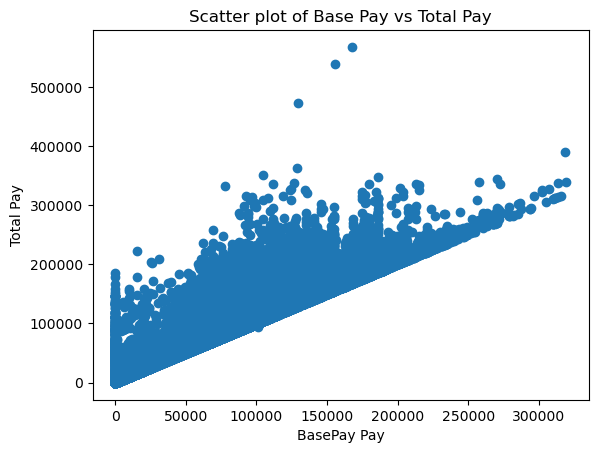

In [16]:
correlations = df[['TotalPay', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits']].corr()
print(correlations)

plt.scatter(df['BasePay'], df['TotalPay'])
plt.xlabel('BasePay Pay')
plt.ylabel('Total Pay')
plt.title('Scatter plot of Base Pay vs Total Pay')
plt.show()


**Summary of Insights**: 
Here is a brief report summarizing the findings and insights from the analyses:

The dataset consists of **148,654 rows** and **13 columns**. The columns represent different attributes such as `Id`, `EmployeeName`, `JobTitle`, `BasePay`, `OvertimePay`, `OtherPay`, `Benefits`, `TotalPay`, `TotalPayBenefits`, `Year`, `Notes`, `Agency`, and `Status`. The data types of these columns range from integers (`int64`), floating-point numbers (`float64`), to objects (`object`).

Upon initial analysis, it was found that there were missing values in the `BasePay`, `OvertimePay`, `OtherPay`, `Benefits`, `Notes`, and `Status` columns. The `Notes` and `Status` columns had the most missing values, with all 148,654 entries being null.

The basic statistics of the `TotalPay` column were calculated, revealing the following:
- Mean Salary: \$74,768.32
- Median Salary: \$71,426.61
- Mode Salary: \$0.00
- Minimum Salary: -\$618.13
- Maximum Salary: \$567,595.43
- Range of Salaries: \$568,213.56
- Standard Deviation of Salaries: \$50,517.01

The dataset was then cleaned by removing rows where the `EmployeeName` and `JobTitle` were not provided. The `Notes` and `Status` columns were dropped due to the high number of missing values. Missing values in the `BasePay`, `OvertimePay`, `OtherPay`, `Benefits`, and `TotalPay` columns were filled using appropriate methods.

Group-wise statistics were calculated for the `TotalPay` column, grouped by `JobTitle` and `Year`. This provided insights into the salary distribution across different job titles and years. A line plot was also generated to visualize the trend of average salary over the years.

Finally, the correlation between different pay components was analyzed,

The correlation matrix is as follows:

|                  | TotalPay | BasePay | OvertimePay | OtherPay | Benefits | TotalPayBenefits |
|------------------|----------|---------|-------------|----------|----------|------------------|
| TotalPay         | 1.000000 | 0.952333| 0.504587    | 0.470136 | 0.631391| 0.975389         |
| BasePay          | 0.952333 | 1.000000| 0.268119    | 0.281787 | 0.654139| 0.946861         |
| OvertimePay      | 0.504587 | 0.268119| 1.000000    | 0.316592 | 0.226165| 0.467981         |
| OtherPay         | 0.470136 | 0.281787| 0.316592    | 1.000000 | 0.160334| 0.422341         |
| Benefits         | 0.631391 | 0.654139| 0.226165    | 0.160334 | 1.000000| 0.781955         |
| TotalPayBenefits | 0.975389 | 0.946861| 0.467981    | 0.422341 | 0.781955| 1.000000         |

This matrix provides insights into the relationships between different pay components. For instance, `TotalPay` has a high positive correlation with `BasePay` and `TotalPayBenefits`, indicating that these components significantly contribute to the total pay.

Furthermore, a scatter plot was created to visualize the relationship between `BasePay` and `TotalPay`. This visualization can help in understanding how BasePay varies with total pay.

This analysis provides a comprehensive understanding of the salary structure and its variations across different job titles and years. It also highlights the importance of data cleaning in handling missing values for a more accurate analysis. The visualizations further aid in intuitively understanding the trends and correlations in the data.